<a href="https://colab.research.google.com/github/LeoCboi/stock_market_analysis_by_python/blob/main/(needed_more_research)bike_sharing_demand_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand

- [데이터 설명](https://www.kaggle.com/c/bike-sharing-demand)



## Step1. LinearRegressor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
bike_df = pd.read_csv('https://raw.githubusercontent.com/zzhining/data_visualization/main/dataset/bike_sharing_demand_train.csv')
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Data Fields**

- datetime - 대여날짜 및 시간 
- season - 계절 (1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 ) 
- holiday - 휴일 
- workingday - 평일(주말과 휴일을 제외한 날) 
- weather - 날씨 
    * 1: 맑음, 대체로 흐림, 일부 흐림 \
    * 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개 
    * 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름 
    * 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
- temp - 섭씨 온도 
- atemp - 체감 온도 
- humidity - 상대 습도 
- windspeed - 풍속 
- casual - 미등록 사용자의 대여 횟수 
- registered - 등록된 사용자의 대여 횟수 
- count - 총 대여수

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [6]:
#[Q1]을 해결하기 위한 코드를 작성하세요
bike_df.shape
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_df.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [3]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### [Q2] bike_df의 데이터 중 숫자가 아닌 데이터가 포함된 필드가 있습니까?

In [4]:
#[Q2]을 해결하기 위한 코드를 작성하세요
bike_df.describe()   #숫자가 아닌 데이터는 없으나, 학습에 불필요한 데이터들은 존재함. 예) casual, registered

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### [Q3]'datetime'에 있는 값을 'year', 'month', 'day', 'hour' 필드에 파싱하여 넣어주세요.
예)
2011-01-01 00:00:00 -> 2011	1	1	0

(힌트)
python의 'datetime64' 포맷을 활용해보세요

In [8]:
#[Q3]해결하기 위한 코드를 작성하세요
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'], format = '%Y-%m-%d %H', errors = 'raise') 
bike_df['datetime']  #이게 맞는건가...?

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

### [Q4] 각 데이터 필드의 값을 확인하시고, 불필요한 필드는 제거해주세요

(힌트)
dataframe의 drop()

In [9]:
#[Q4]을 해결하기 위한 코드를 작성하세요
bike_df.drop(['registered','casual'], axis = 1, inplace = True)  #registered, causal 열들이 내 눈엔 불필요해보임...

### [Q5] 모델을 만들기 위해 train set과 test set으로 분리해주세요.
 1) 종속변수y 에 해당하는 값을 Y로 할당    
 2) 독립변수x 에 해당하는 값을 X로 할당  
 3) train_test_split 함수를 사용해서 분리(train:test = 7:3, random_state=0)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#[Q5]을 해결하기 위한 코드를 작성하세요
y = bike_df['count']
X = bike_df.drop(['count', 'datetime'], axis=1,inplace=False)


# X_scaled = StandardScaler().fit_transform(X), 서로다른 데이터들을 합칠 때 쓰기에 굳이 안써도 됨.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)  #강사님꺼는 왜 랜덤스테이트가 0인가??

### [Q6] LinearRegression을 사용하여 예측하는 모델을 학습시킵니다.

In [12]:
#[Q6]을 해결하기 위한 코드를 작성하세요
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)  ## 가중치 등의 값들이 너무 무한 소수대로 이어지다 보니, 중간에 자르는 방법은 없는가?

weight: [24.2049001  -8.13901331  2.3472421   8.09506065  1.32915667  5.92307971
 -3.1171212   0.72537999]
bias: 134.32551449165908


### [Q7] 모델을 사용하여 테스트 셋으로 분리한 값(X_test)의 예측값을 구합니다.

In [ ]:
#[Q7]을 해결하기 위한 코드를 작성하세요

In [13]:
score = lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

#coef_sort = coef.sort_values(ascending=False)
#sns.barplot(x=coef_sort.values, y=coef_sort.index)  * 데이터 형태 보기 위한 것임. 사용말 것것

#coef = pd.Series(data=np.round(lr_model.coef_, 1), index = X.columns)
#coef *데이터 형태 보기 위한 것임. 사용말 것

선형회귀 모델 R2: 0.26


In [17]:
pred = lr_model.predict(X_test)

In [ ]:
# 아무튼,,, X_test / y_test 데이터로 학습시킨 것은 상당히 예측도가 낮다.

### [Q8] 모델의 정확도를 측정합니다. 
이 대회에서 정확도 평가는 RMSLE(Root Mean Squared Log Error)입니다. RMSLE는 아래 함수를 사용하세요

In [18]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

In [19]:
#[Q8]을 해결하기 위한 코드를 작성하세요
y_pred = lr_model.predict(X_test)
print(y_test, y_pred)

3133    127
5786     13
5224    163
8953    233
8054    222
       ... 
5527     86
7417    157
5700    281
8303    152
411       2
Name: count, Length: 3266, dtype: int64 [315.97026426  40.36146402 179.44154938 ... 129.22396701 319.55649216
 -18.8975976 ]


In [20]:
rmsle(y_test, pred)

RMSLE: 1.3464


1.3463643517954154

## Step2. 모델 성능 개선하기

### [Q1] 예측값과 실제값의 차이가 가장 많이 나는 데이터 5개 출력
아래 함수를 실행시켜 보세요

In [21]:
def get_top5_error_data(y_test, pred):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:5])
    return(result_df)
get_top5_error_data(y_test, pred)

      real_count  predicted_count   diff
1094         977            312.0  665.0
1841         884            242.0  642.0
361          948            312.0  636.0
1654         888            254.0  634.0
1872         890            259.0  631.0


,real_count,predicted_count,diff
0,127,316.0,189.0
1,13,40.0,27.0
2,163,179.0,16.0
3,233,283.0,50.0
4,222,258.0,36.0
...,...,...,...
3261,86,109.0,23.0
3262,157,203.0,46.0
3263,281,129.0,152.0
3264,152,320.0,168.0


In [22]:
#[Q1]을 해결하기 위한 코드를 작성하세요
# 근데 위의 분산(차이)값과 아래의 차이값이 차이나는 이유는 무엇인가?
return_df = get_top5_error_data(y_test, y_pred)

      real_count  predicted_count   diff
1094         977            312.0  665.0
1841         884            242.0  642.0
361          948            312.0  636.0
1654         888            254.0  634.0
1872         890            259.0  631.0


### [Q2] Y값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.

<Axes: >

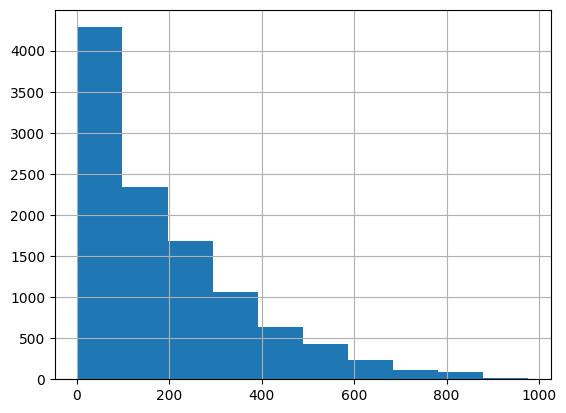

In [23]:
y.hist()

<Axes: >

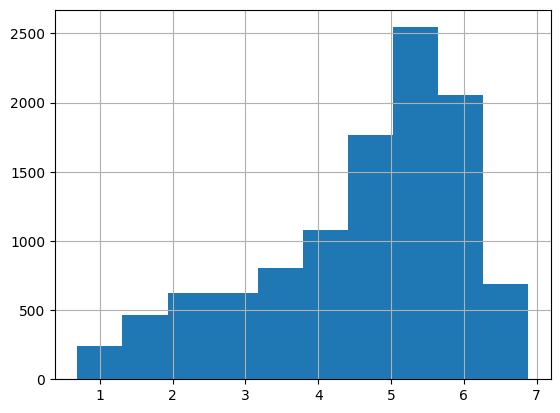

In [25]:
#[Q2]을 해결하기 위한 코드를 작성하세요
y_log = np.log1p(y)
y_log.hist()

In [29]:
#[Q2]을 해결하기 위한 코드를 작성하세요
from sklearn.feature_selection import SelectKBest, f_regression

# k = 3
X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(X, y)
features = X.columns[X_selected.get_support()]    
print('features = {}'.format(features))

features = Index(['temp', 'atemp', 'humidity'], dtype='object')


In [41]:
X_selected = bike_df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)

temp        0.003691
atemp      -0.102560
humidity   -0.086335
dtype: float64


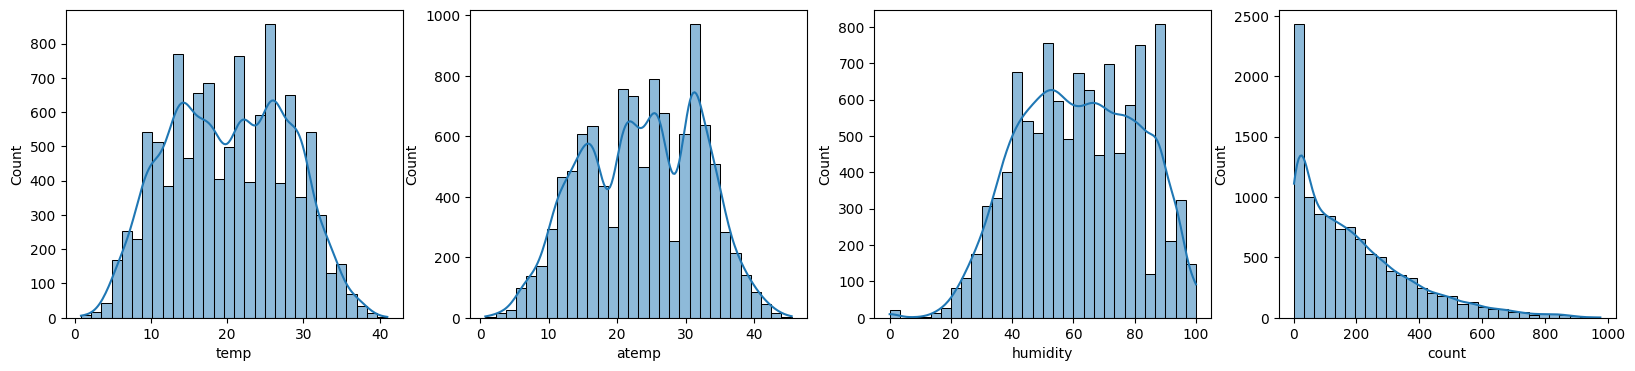

In [42]:
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())

### [Q3] Y의 로그값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.  
(힌트) 로그변환: numpy의 log1p() 함수


temp        0.003691
atemp      -1.427311
humidity   -0.086335
dtype: float64

atemp: -1.48


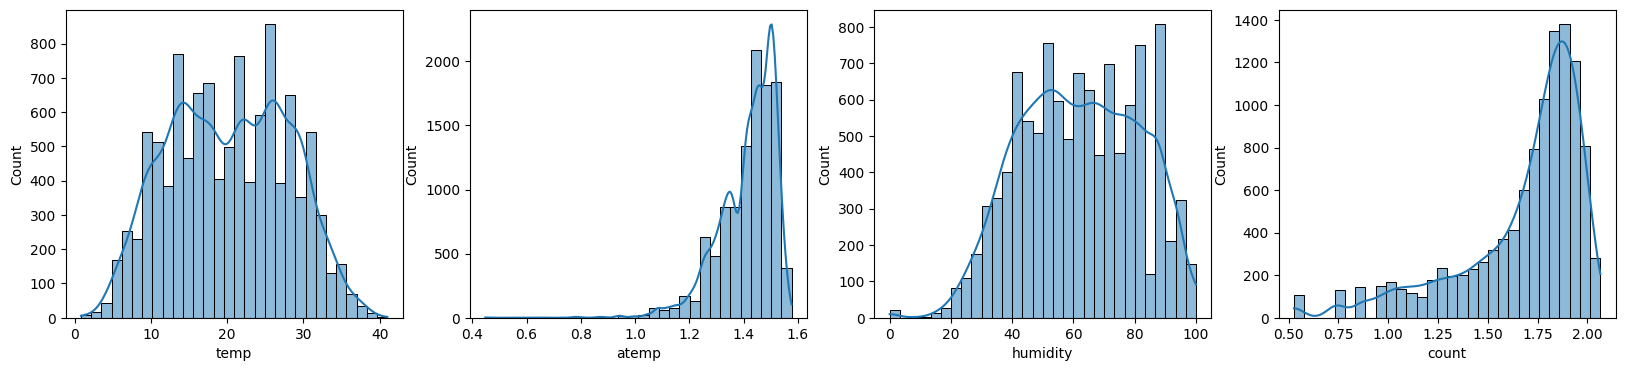

In [44]:
#[Q3]을 해결하기 위한 코드를 작성하세요
X_selected['atemp']=np.log1p(X_selected['atemp'])
y = np.log1p(y)

#atemp 기준으로 데이터 분포 확인


nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\natemp: {0:.2f}'.format(y.skew()))  ## atemp 와의 연관성이 그나마 비슷해보임

temp       -0.853910
atemp      -1.427311
humidity   -0.086335
dtype: float64

temp: -1.84


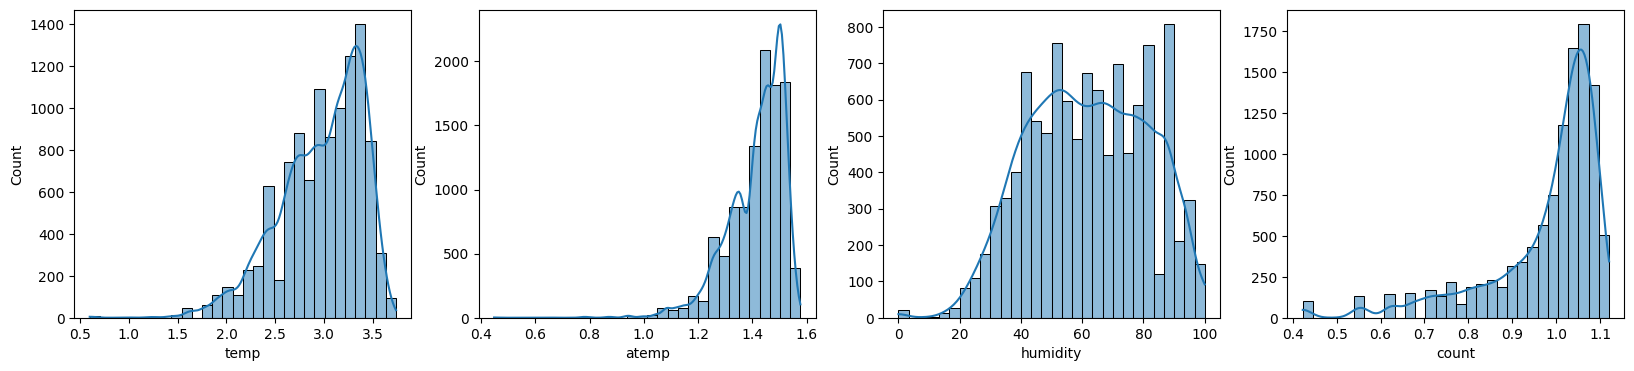

In [45]:
#[Q3]을 해결하기 위한 코드를 작성하세요
X_selected['temp']=np.log1p(X_selected['temp'])
y = np.log1p(y)

#atemp 기준으로 데이터 분포 확인


nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\ntemp: {0:.2f}'.format(y.skew()))

temp       -0.853910
atemp      -1.427311
humidity   -2.900297
dtype: float64

humidity: -2.08


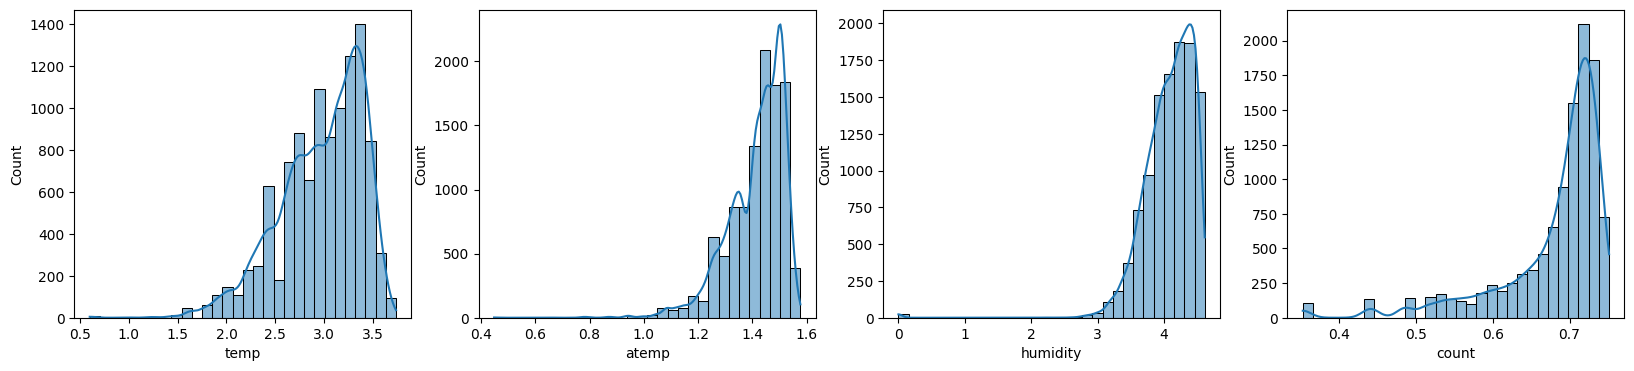

In [46]:
#[Q3]을 해결하기 위한 코드를 작성하세요
X_selected['humidity']=np.log1p(X_selected['humidity'])
y = np.log1p(y)

#atemp 기준으로 데이터 분포 확인


nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\nhumidity: {0:.2f}'.format(y.skew()))

### [Q4] Y의 로그값을 사용하여 모델 만들어보기

* 모델 학습, 예측, 평가는 get_model_predict()를 이용하세요.

In [26]:
# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=0)

In [29]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
        y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [30]:
#[Q4]을 해결하기 위한 코드를 작성하세요.
lr_model_with_log = LinearRegression()
get_model_predict(lr_model_with_log, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 1.2161


### [Q5] 선형회귀모델에서 가장 영향을 많으 주는 종속변수 알아보기
아래 함수를 실행시키세요

In [31]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

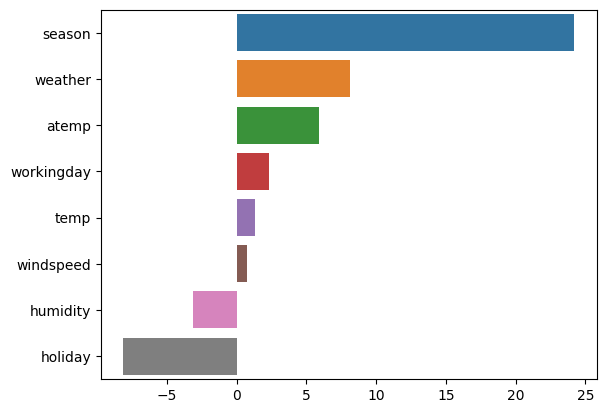

In [33]:
#[Q5]을 해결하기 위한 코드를 작성하세요
plotFeatureList(lr_model, X)  ## 최초 랜덤스테이트 42로 인한 값의 변화??

### [Q6] 수치형 데이터 중 카테고리형 데이터 One Hot Encoding 하기

In [37]:
#[Q6]을 해결하기 위한 코드를 작성하세요
from sklearn.preprocessing import OneHotEncoder
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X, columns=['holiday','workingday','season','weather'])

### [Q7] One Hot Encoding 적용된 feature 데이터 세트 기반으로 학습/예측 

 * 데이터 분할
 * 학습: LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor
 * 예측
 * 평가

In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [40]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log, test_size=0.3, random_state=0)

# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]
for model in model_list:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 1.2047
### RandomForestRegressor ###
RMSLE: 1.1703
### GradientBoostingRegressor ###
RMSLE: 1.1660
### XGBRegressor ###
RMSLE: 1.2379
### LGBMRegressor ###
RMSLE: 1.1656


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'
    .format(mse , rmse, r2))

y_pred = lr_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 24382.675 , RMSE : 156.150, r2 : 0.251


In [98]:
#[Q7]을 해결하기 위한 코드를 작성하세요
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [100]:
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [101]:
Grad_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
Grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [102]:
model_list = [lr_model, forest_model, lgb_model, xgb_model, Grad_model]

for model in model_list:
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2)) 

LinearRegression MSE : 24382.675 , RMSE : 156.150, r2 : 0.251
RandomForestRegressor MSE : 25255.561 , RMSE : 158.920, r2 : 0.224
LGBMRegressor MSE : 23299.696 , RMSE : 152.642, r2 : 0.284
XGBRegressor MSE : 24248.806 , RMSE : 155.720, r2 : 0.255
GradientBoostingRegressor MSE : 23040.654 , RMSE : 151.791, r2 : 0.292
